### Exchange Market / Incresing Volume

Predict a trader's likelihood of increasing their trading `volume` in the next quarter.   
This is a `binary` outcome (Yes/No). 

The dataset is split into training and `testing` sets for model evaluation.  
We can `only` predict sample that are in dataset (based on the decision hierarchy).  

Training dataset


,TraderID,Average Trading Volume,Preferred Currency Pair,Trading Frequency,Market Condition,Recent Activity DayOfMonth,Likelihood of Increasing Trading Volume
0,101,5000,EURUSD,Daily,Volatile,12,Yes
1,102,3000,GBPJPY,Weekly,Stable,6,No
2,103,7000,USDJPY,Monthly,Volatile,20,Yes
3,104,2000,EURJPY,Daily,Stable,15,No
4,105,10000,GBPUSD,Weekly,Volatile,9,Yes
5,106,4000,USDCAD,Daily,Stable,22,No
6,107,8000,AUDUSD,Monthly,Volatile,30,Yes
7,108,6000,EURGBP,Weekly,Stable,4,No
8,109,9000,USDCHF,Daily,Volatile,18,Yes
9,110,2000,NZDUSD,Monthly,Stable,11,No


Encoded:


,TraderID,Average Trading Volume,Preferred Currency Pair,Trading Frequency,Market Condition,Recent Activity DayOfMonth,Likelihood of Increasing Trading Volume
0,101,5000,3,0,1,12,1
1,102,3000,4,2,0,6,0
2,103,7000,9,1,1,20,1
3,104,2000,2,0,0,15,0
4,105,10000,5,2,1,9,1
5,106,4000,7,0,0,22,0
6,107,8000,0,1,1,30,1
7,108,6000,1,2,0,4,0
8,109,9000,8,0,1,18,1
9,110,2000,6,1,0,11,0



 Sample (from dataset):


,TraderID,Average Trading Volume,Preferred Currency Pair,Trading Frequency,Market Condition,Recent Activity DayOfMonth
6,107,8000,0,1,1,30


Prediction: 1
Likelihood of Increasing Trading Volume: Yes
Model Accuracy: 1.0


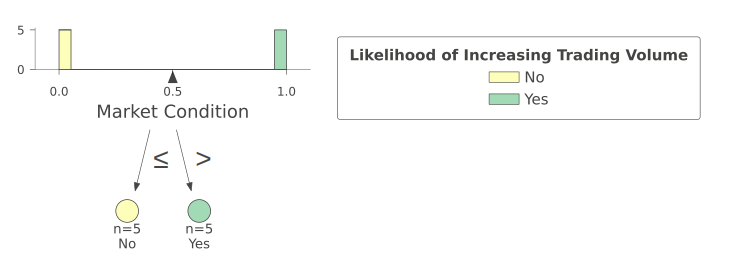

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

data = {
    "TraderID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "Average Trading Volume": [5000, 3000, 7000, 2000, 10000, 4000, 8000, 6000, 9000, 2000],
    "Preferred Currency Pair": [
        "EURUSD", "GBPJPY", "USDJPY", "EURJPY", "GBPUSD",
        "USDCAD", "AUDUSD", "EURGBP", "USDCHF", "NZDUSD"
    ],
    "Trading Frequency": [
        "Daily", "Weekly", "Monthly", "Daily", "Weekly", 
        "Daily", "Monthly", "Weekly", "Daily", "Monthly"
    ],
    "Market Condition": [
        "Volatile", "Stable", "Volatile", "Stable", "Volatile", 
        "Stable", "Volatile", "Stable", "Volatile", "Stable"
    ],
    "Recent Activity DayOfMonth": [12, 6, 20, 15, 9, 22, 30, 4, 18, 11],
    "Likelihood of Increasing Trading Volume": [
        "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No"
    ]  
}

df = pd.DataFrame(data)
print("Training dataset"); display(df)

# ----------------------------------------------------------------------------

# df_encoded = pd.DataFrame()
# for col in df.columns:
#     df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Encode labels for categorical data (only)
df_encoded = pd.DataFrame()
for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df[col])
    else:
        df_encoded[col] = df[col] # Numerical columns are left as they are

print("Encoded:"); display(df_encoded)

# ----------------------------------------------------------------------------

# Define the feature columns and target column
features = [
    "TraderID", 
    "Average Trading Volume", 
    "Preferred Currency Pair", 
    "Trading Frequency", 
    "Market Condition", 
    "Recent Activity DayOfMonth",
]
target = "Likelihood of Increasing Trading Volume"

# Train data
X = df_encoded[features]
y = df_encoded[target]

# Fitting the model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X, y)

# ----------------------------------------------------------------------------

# Predict (sample)
x_sample =  X.iloc[6] # expect 1
x_sample = pd.DataFrame([x_sample], columns=X.columns)
y_pred = dtree_model.predict(x_sample)[0]

# Output result
print("\n Sample (from dataset):"); display(x_sample)
print("Prediction:", y_pred)
print("Likelihood of Increasing Trading Volume:", "Yes" if y_pred == 1 else "No")

# ----------------------------------------------------------------------------

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded[features], df_encoded[target], test_size=0.2, random_state=0
)

# Fitting the model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = dtree_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

#------------------------------------------------------------------------------

import dtreeviz
import logging, warnings
logging.getLogger('matplotlib').setLevel(logging.ERROR) # font arial not found
warnings.filterwarnings(action='ignore', category=UserWarning)

# Visualizing the decision tree
viz_model = dtreeviz.model(dtree_model, 
        X_train=df_encoded[features], y_train=df_encoded[target],
        feature_names=X.columns,
        target_name="Likelihood of Increasing Trading Volume",
        class_names=["No", "Yes"])

# Display the decision tree (inline)
viz_model.view(scale=2.0)


### One Trader

We can make `predictions` based for one trader (by month).  
The dataset contains record for `one` trader.  

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data = {
    "Trader ID": [1001] * 12,
    "Month": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Representing each month
    "Average Trading Volume": [5000, 5200, 4800, 5000, 5500, 5300, 5100, 5200, 5400, 5600, 5800, 5700],
    "Change in Trading Volume (%)": [0, 4, -8, 4, 10, -4, -4, 2, 4, 4, 4, -2],
    "Preferred Currency Pair": ["EURUSD"] * 12,
    "Trading Frequency": ["Daily"] * 12,
    "Market Condition": [
        "Volatile", "Stable", "Volatile", "Stable", "Volatile", "Stable", 
        "Volatile", "Stable", "Volatile", "Stable", "Volatile", "Stable"
    ],
    "Likelihood of Increasing Trading Volume": [
        "No", "Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "No"
    ]
}

df = pd.DataFrame(data)
print("Training dataset"); display(df)

# ----------------------------------------------------------------------------

# Encode labels for categorical data
df_encoded = pd.DataFrame()
for col in df.columns:

    # Categorical data is encoded to be understandable by the machine learning model
    if df[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df[col])
    else:
        # Numerical columns are left as they are 
        df_encoded[col] = df[col] 

print("Encoded:"); display(df_encoded)

# ----------------------------------------------------------------------------

# Define the feature columns and target column
features = [
    "Month",
    "Average Trading Volume", 
    "Change in Trading Volume (%)",
    "Preferred Currency Pair", 
    "Trading Frequency", 
    "Market Condition",
]
target = "Likelihood of Increasing Trading Volume"

# Train data
X = df_encoded[features]
y = df_encoded[target]

# Fitting the model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X, y)

# ----------------------------------------------------------------------------

# Predict (known)
x_unknown = X[X['Month'] == 6].iloc[-1]
x_unknown['Average Trading Volume'] = int(x_unknown['Average Trading Volume'] * 1.05)
x_unknown = pd.DataFrame([x_unknown], columns=X.columns)
y_pred_unknown = dtree_model.predict(x_unknown)[0]

# Output result
print("\n Month (unknown):", 6); display(x_unknown)
print("Prediction:", y_pred_unknown)
print("Likelihood of Increasing Trading Volume:", "Yes" if y_pred_unknown == 1 else "No")

Training dataset


,Trader ID,Month,Average Trading Volume,Change in Trading Volume (%),Preferred Currency Pair,Trading Frequency,Market Condition,Likelihood of Increasing Trading Volume
0,1001,1,5000,0,EURUSD,Daily,Volatile,No
1,1001,2,5200,4,EURUSD,Daily,Stable,Yes
2,1001,3,4800,-8,EURUSD,Daily,Volatile,No
3,1001,4,5000,4,EURUSD,Daily,Stable,Yes
4,1001,5,5500,10,EURUSD,Daily,Volatile,Yes
5,1001,6,5300,-4,EURUSD,Daily,Stable,No
6,1001,7,5100,-4,EURUSD,Daily,Volatile,No
7,1001,8,5200,2,EURUSD,Daily,Stable,Yes
8,1001,9,5400,4,EURUSD,Daily,Volatile,Yes
9,1001,10,5600,4,EURUSD,Daily,Stable,Yes


Encoded:


,Trader ID,Month,Average Trading Volume,Change in Trading Volume (%),Preferred Currency Pair,Trading Frequency,Market Condition,Likelihood of Increasing Trading Volume
0,1001,1,5000,0,0,0,1,0
1,1001,2,5200,4,0,0,0,1
2,1001,3,4800,-8,0,0,1,0
3,1001,4,5000,4,0,0,0,1
4,1001,5,5500,10,0,0,1,1
5,1001,6,5300,-4,0,0,0,0
6,1001,7,5100,-4,0,0,1,0
7,1001,8,5200,2,0,0,0,1
8,1001,9,5400,4,0,0,1,1
9,1001,10,5600,4,0,0,0,1



 Month (unknown): 6


,Month,Average Trading Volume,Change in Trading Volume (%),Preferred Currency Pair,Trading Frequency,Market Condition
5,6,5565,-4,0,0,0


Prediction: 0
Likelihood of Increasing Trading Volume: No


### Multiple Traders / Not Seen

Training a model on data from `multiple` traders can help it learn more general patterns and behaviors.    
This can `improve` the model's ability to make accurate predictions.  
Also, we can predict for new sample not `seen` in the dataset.

Training dataset


,Trader ID,Month,Average Trading Volume,Change in Trading Volume (%),Preferred Currency Pair,Trading Frequency,Market Condition,Likelihood of Increasing Trading Volume
0,1001,1,5000,0,EURUSD,Daily,Volatile,No
1,1001,2,5200,4,EURUSD,Daily,Stable,Yes
2,1001,3,4800,-8,EURUSD,Daily,Volatile,No
3,1001,4,5000,4,EURUSD,Daily,Stable,Yes
4,1001,5,5500,10,EURUSD,Daily,Volatile,Yes
5,1001,6,5300,-4,EURUSD,Daily,Stable,No
6,1001,7,5100,-4,EURUSD,Daily,Volatile,No
7,1001,8,5200,2,EURUSD,Daily,Stable,Yes
8,1001,9,5400,4,EURUSD,Daily,Volatile,Yes
9,1001,10,5600,4,EURUSD,Daily,Stable,Yes


Encoded:


,Trader ID,Month,Average Trading Volume,Change in Trading Volume (%),Preferred Currency Pair,Trading Frequency,Market Condition,Likelihood of Increasing Trading Volume
0,1001,1,5000,0,0,0,1,0
1,1001,2,5200,4,0,0,0,1
2,1001,3,4800,-8,0,0,1,0
3,1001,4,5000,4,0,0,0,1
4,1001,5,5500,10,0,0,1,1
5,1001,6,5300,-4,0,0,0,0
6,1001,7,5100,-4,0,0,1,0
7,1001,8,5200,2,0,0,0,1
8,1001,9,5400,4,0,0,1,1
9,1001,10,5600,4,0,0,0,1


Model Accuracy: 1.0

 Unknown Trader:


,Month,Average Trading Volume,Change in Trading Volume (%),Preferred Currency Pair,Trading Frequency,Market Condition
0,12,5800,0,0,0,1


Prediction: 1
Likelihood of Increasing Trading Volume: Yes


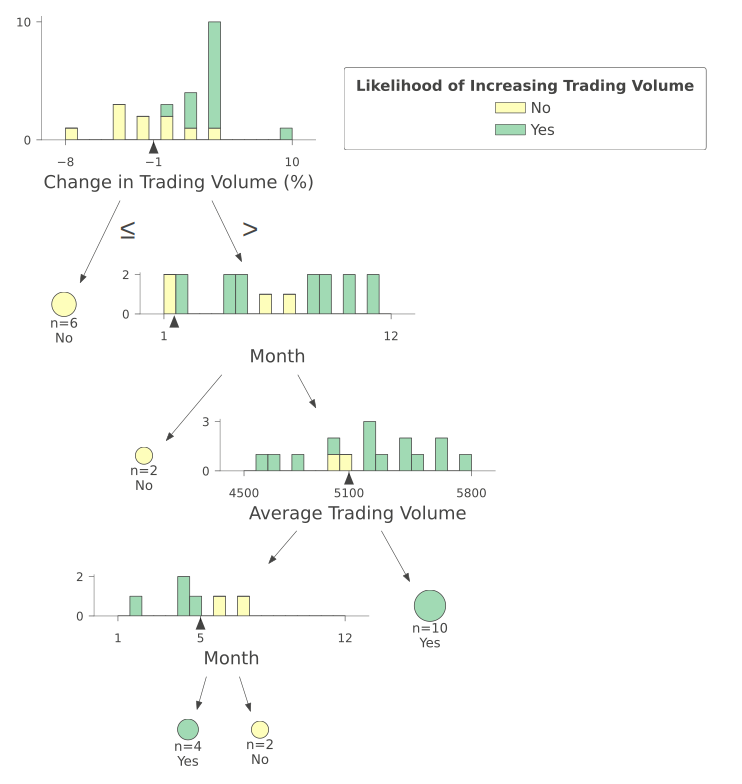

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Sample data for 2 traders over 12 months
data = {
    "Trader ID": 
        [1001]*12 + [1002]*12,
    "Month": 
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]*2,
    "Average Trading Volume": [
        5000, 5200, 4800, 5000, 5500, 5300, 5100, 5200, 5400, 5600, 5800, 5700,
        4500, 4700, 4500, 4600, 4800, 5000, 5100, 5200, 5300, 5400, 5600, 5500
    ],
    "Change in Trading Volume (%)": [
        0, 4, -8, 4, 10, -4, -4, 2, 4, 4, 4, -2, 0, 4, -4, 2, 4, 4, 2, 0, 2, 4, 4, -2
    ],
    "Preferred Currency Pair": ["EURUSD"]*12 + ["USDJPY"]*12,
    "Trading Frequency": ["Daily"]*12 + ["Weekly"]*12,
    "Market Condition": [
        "Volatile", "Stable", "Volatile", "Stable", "Volatile", "Stable", 
        "Volatile", "Stable", "Volatile", "Stable", "Volatile", "Stable"
    ]*2,
    "Likelihood of Increasing Trading Volume": [
        "No", "Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "No"
    ]*2
}

df = pd.DataFrame(data)

# ----------------------------------------------------------------------------

# Encode labels for categorical data
df_encoded = pd.DataFrame()
for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df[col])
    else:
        df_encoded[col] = df[col]

# Define features and target
features = [
    "Month", 
    "Average Trading Volume", 
    "Change in Trading Volume (%)", 
    "Preferred Currency Pair", 
    "Trading Frequency", 
    "Market Condition"
]
target = "Likelihood of Increasing Trading Volume"

# ----------------------------------------------------------------------------

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded[features], df_encoded[target], test_size=0.2, random_state=42
)

# Create and train the decision tree model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

print("Training dataset"); display(df)
print("Encoded:"); display(df_encoded)

# Making predictions and evaluating the model
y_pred = dtree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# ----------------------------------------------------------------------------

# Predicting for Trader 1001 for Month 13 (not in the dataset)
unknown_data = {
    "Trader ID": [1003],
    "Month": [12],
    "Average Trading Volume": [5800],  # hypothetical data
    "Change in Trading Volume (%)": [0],  # hypothetical data
    "Preferred Currency Pair": ["EURUSD"],
    "Trading Frequency": ["Daily"],
    "Market Condition": ["Volatile"]
}

df_unknown = pd.DataFrame(unknown_data)

# Encode unknown data
for col in df_unknown.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(df[col])
        df_unknown[col] = le.transform(df_unknown[col])

x_unknown = df_unknown[features]

# Prediction
y_pred_unknown = dtree_model.predict(x_unknown)[0]

print("\n Unknown Trader:"); display(x_unknown)
print("Prediction:", y_pred_unknown)
print("Likelihood of Increasing Trading Volume:", "Yes" if y_pred_unknown == 1 else "No")

#------------------------------------------------------------------------------

import dtreeviz
import logging, warnings
logging.getLogger('matplotlib').setLevel(logging.ERROR) # font arial not found
warnings.filterwarnings(action='ignore', category=UserWarning)

# Visualizing the decision tree
viz_model = dtreeviz.model(dtree_model, 
        X_train=df_encoded[features], y_train=df_encoded[target],
        feature_names=X.columns,
        target_name="Likelihood of Increasing Trading Volume",
        class_names=["No", "Yes"])

# Display the decision tree (inline)
viz_model.view(scale=2.0)
